**Overview**

Regression is one of the foundational techniques in Machine Learning. Being one of the
most well-understood algorithms, beginners always struggle to understand some
fundamental terminology related to regression. In this series of projects, we try to give
you basic ideas of underlying concepts with the help of practical examples. If you are
starting your career or want to brush up on your knowledge of regression, this course is
made up for you. This project begins by introducing some simple real-life examples for
regression. From a brief introduction to most of the concepts used in regression to
hands-on experience, this project will give you enough understanding to apply those in
real-world problems. With the help of the background developed, you will code your
regression model in python.

**Aim**

To give a gentle introduction to the fundamentals of regression and build a simple linear
regression model in python.

**Data Description**

The dataset used is the soccer player dataset. It has information about various players
from different clubs, and it provides data over ten features with a number of goals as the
target variable.


In [348]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [349]:
data = pd.read_csv('EPL_Soccer_MLR_LR.csv')

In [350]:
data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [351]:
data.shape

(202, 13)

In [352]:
for i in range(data.shape[1]):
    print(data.columns[i])

PlayerName
Club
DistanceCovered(InKms)
Goals
MinutestoGoalRatio
ShotsPerGame
AgentCharges
BMI
Cost
PreviousClubCost
Height
Weight
Score


In [353]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [355]:
data.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

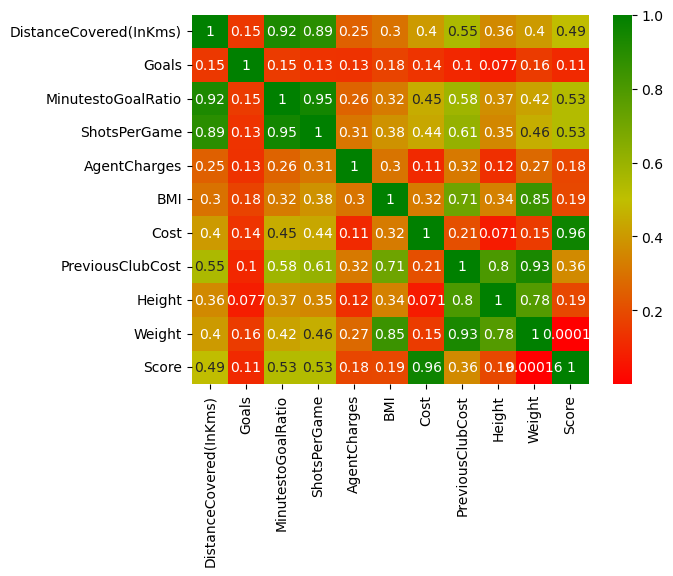

In [359]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('ryg',["r","y", "g"], N=1000)
sns.heatmap(data=data.corr(numeric_only=True).abs(), annot=True, cmap=cmap);

In [362]:
size = data.corr(numeric_only=True).abs()['Score'].shape[0]
columns = data.corr(numeric_only=True).columns
for i in range(size):
    if data.corr(numeric_only=True).abs()['Score'][i] > 0.8:
        print(f"Very Strong Correlation with {columns[i]} ({data.corr(numeric_only=True)['Score'][i]})")
    elif data.corr(numeric_only=True).abs()['Score'][i] > 0.6:
        print(f"Strong Correlation with {columns[i]} ({data.corr(numeric_only=True)['Score'][i]})")
    elif data.corr(numeric_only=True).abs()['Score'][i] > 0.4:
        print(f"Moderate Correlation with {columns[i]} ({data.corr(numeric_only=True)['Score'][i]})")

Moderate Correlation with DistanceCovered(InKms) (-0.49351225776766294)
Moderate Correlation with MinutestoGoalRatio (-0.5324490850641169)
Moderate Correlation with ShotsPerGame (-0.5315220600093323)
Very Strong Correlation with Cost (0.9630168489926477)
Very Strong Correlation with Score (1.0)


In [363]:
X = data['Cost'].to_numpy()
Y = data['Score'].to_numpy()

Cost Function Formula
(1/2*m)*sum((y-y_hat)^2)

In [364]:
def deriv_dJdw(m, X, Y, w, b):
    sum = 0
    for i in range(m):
        sum += X[i]*(Y[i]-(w*X[i]+b))
    return sum*(-1/m)

def deriv_dJdb(m, X, Y, w, b):
    sum = 0
    for i in range(m):
        sum += (Y[i]-(w*X[i]+b))
    return sum*(-1/m)

def Cost_J(m, X, Y, w, b):
    sum = 0
    for i in range(m):
        sum += (Y[i]-(w*X[i]+b))**2
    return sum*(1/(2*m))

In [374]:
w = np.random.randn()
b = np.random.randn()
lr = 0.00031
epochs = 200
m = int(np.round(X.shape[0]*0.8))
X_train = X[:m]
X_test = X[m:]
Y_train = Y[:m]
Y_test = Y[m:]

w = 0.20779896809860174 , b = -1.075323662168656
Test Cost = 0.903215499183287
Train Cost = 1.9416570404096458


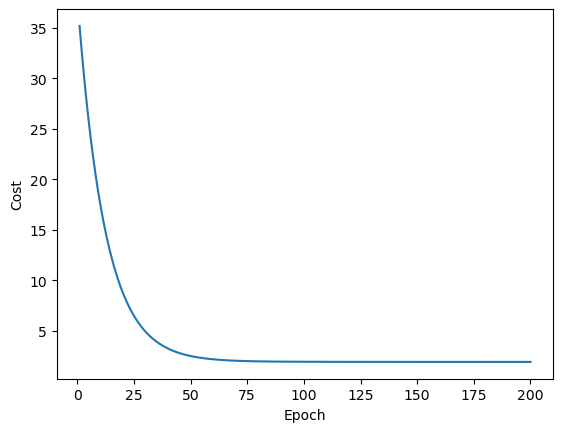

In [375]:
cost_array = np.array([])
epoch = np.arange(1, epochs+1)
for i in range(epochs):
    dJdw = deriv_dJdw(m, X_train, Y_train, w, b)
    dJdb = deriv_dJdb(m, X_train, Y_train, w, b)
    w_temp = w - lr*dJdw
    b_temp = b - lr*dJdb
    w = w_temp
    b = b_temp
    cost_array = np.append(cost_array, Cost_J(m, X_train, Y_train, w, b))

    
data = {'Epoch': epoch, 'Cost': cost_array}
sns.lineplot(data=data, x='Epoch', y='Cost')
print(f"w = {w} , b = {b}")
n = X.shape[0] - m 
print(f"Test Cost = {Cost_J(n, X_test, Y_test, w, b)}")
print(f"Train Cost = {Cost_J(m, X_train, Y_train, w, b)}")
